#### Load Important Libraries

In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
plt.style.use('ggplot')
#plt.style.use('fivethirtyeight')

#### Reading the Data

In [78]:
# File paths
class_file = 'CLASS.xlsx'
data_file = 'death_population_final_combined.xlsx'

# Read the files
class_df = pd.read_excel(class_file)
data_df = pd.read_excel(data_file)

# Displaying the first few rows of each dataframe to understand the structure
class_df.head()


,Economy,Code,Region,Income group,Lending category
0,Aruba,ABW,Latin America & Caribbean,High income,NaN
1,Afghanistan,AFG,South Asia,Low income,IDA
2,Angola,AGO,Sub-Saharan Africa,Lower middle income,IBRD
3,Albania,ALB,Europe & Central Asia,Upper middle income,IBRD
4,Andorra,AND,Europe & Central Asia,High income,NaN


In [79]:
data_df.head()

,year,country,total_deaths,no_injured,total_damage_000_usd,total_damage_adjusted_000_usd,country_code,population
0,2001,Afghanistan,485.0,20.0,10.0,17.0,AFG,19688632.0
1,2002,Afghanistan,4083.0,1391.0,0.0,0.0,AFG,21000256.0
2,2003,Afghanistan,137.0,4.0,0.0,0.0,AFG,22645130.0
3,2004,Afghanistan,18.0,40.0,0.0,0.0,AFG,23553551.0
4,2005,Afghanistan,570.0,44.0,5050.0,7568.0,AFG,24411191.0


In [80]:
# Merging the data on the country code to combine regional information with the yearly data
merged_df = pd.merge(data_df, class_df[['Code', 'Region']], left_on='country_code', right_on='Code', how='left')

# Calculating the mortality rate per 100,000 people for each year and country
merged_df['mortality_rate'] = (merged_df['total_deaths'] / merged_df['population']) * 1000000

# Grouping the data by region and year to create a region-wise dataset
region_yearly_df = merged_df.groupby(['Region', 'year']).agg(
    total_deaths=pd.NamedAgg(column='total_deaths', aggfunc='sum'),
    total_population=pd.NamedAgg(column='population', aggfunc='sum'),
).reset_index()

# Calculating the mortality rate per 100,000 people for each region and year
region_yearly_df['mortality_rate'] = (region_yearly_df['total_deaths'] / region_yearly_df['total_population']) * 100000

# Checking the final grouped dataset
region_yearly_df.head()

,Region,year,total_deaths,total_population,mortality_rate
0,East Asia & Pacific,2001,3094.0,2.043839e+09,0.151382
1,East Asia & Pacific,2002,3277.0,2.061155e+09,0.158989
2,East Asia & Pacific,2003,2730.0,2.077692e+09,0.131396
3,East Asia & Pacific,2004,178682.0,2.093640e+09,8.534512
4,East Asia & Pacific,2005,3198.0,2.109418e+09,0.151606


In [81]:
region_yearly_df.isna().sum()

Region              0
year                0
total_deaths        0
total_population    0
mortality_rate      0
dtype: int64

In [82]:
# Getting the unique income groups
region_groups = region_yearly_df['Region'].dropna().unique()
region_groups

array(['East Asia & Pacific', 'Europe & Central Asia',
       'Latin America & Caribbean', 'Middle East & North Africa',
       'North America', 'South Asia', 'Sub-Saharan Africa'], dtype=object)

In [83]:
# Filter the data for Afghanistan
selected_group = 'Latin America & Caribbean'
group = region_yearly_df[region_yearly_df['Region'] == selected_group]

group.tail()

,Region,year,total_deaths,total_population,mortality_rate
64,Latin America & Caribbean,2019,1141.0,644925252.0,0.176920
65,Latin America & Caribbean,2020,947.0,650167164.0,0.145655
66,Latin America & Caribbean,2021,2921.0,654616032.0,0.446216
67,Latin America & Caribbean,2022,1676.0,658949251.0,0.254344
68,Latin America & Caribbean,2023,767.0,663610380.0,0.115580


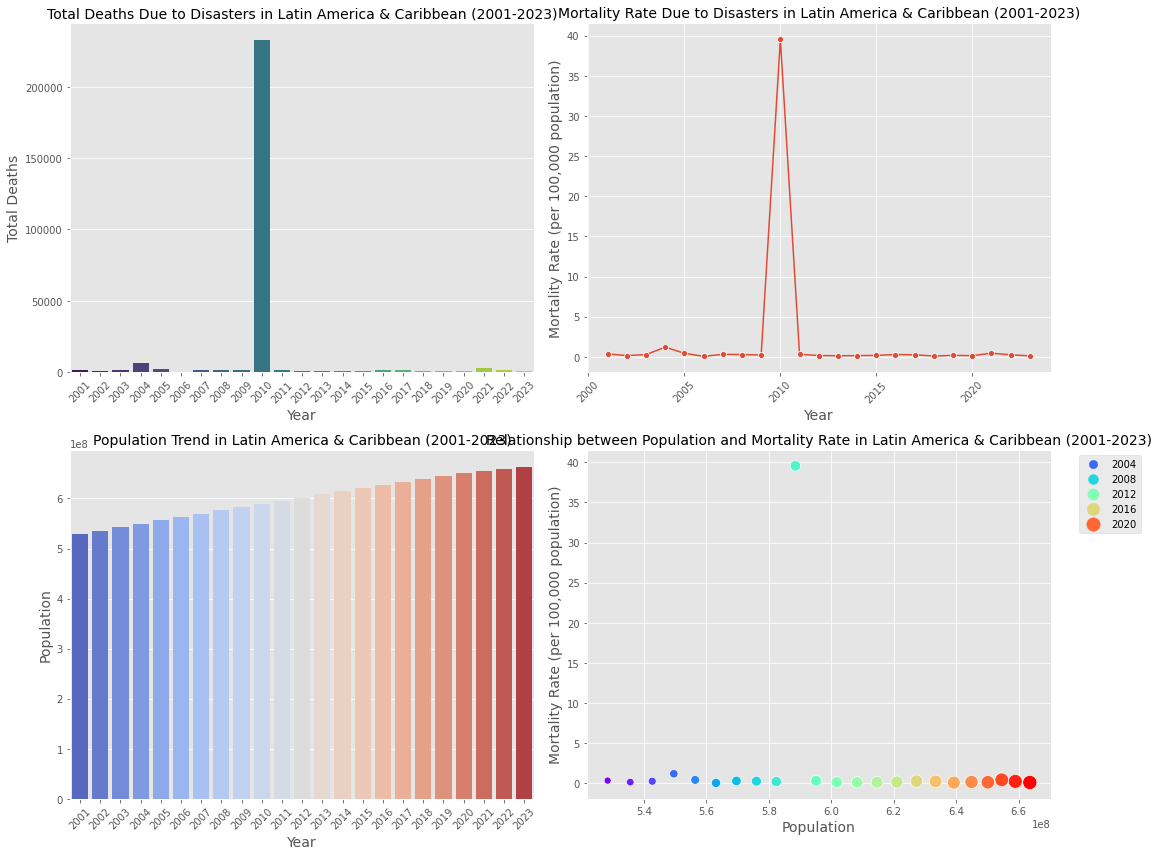

In [84]:
# Create a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(16, 12))

# 1. Bar plot to visualize total deaths each year
sns.barplot(data=group, x='year', y='total_deaths', palette='viridis', ax=axs[0, 0])
axs[0, 0].set_title(f'Total Deaths Due to Disasters in {selected_group} (2001-2023)', fontsize = 14)
axs[0, 0].set_xlabel('Year', fontsize = 14)
axs[0, 0].set_ylabel('Total Deaths', fontsize = 14)
axs[0, 0].tick_params(axis='x', rotation=45)

# 2. Line plot for mortality rate over the years
sns.lineplot(data=group, x='year', y='mortality_rate', marker='o', ax=axs[0, 1])
axs[0, 1].set_title(f'Mortality Rate Due to Disasters in {selected_group} (2001-2023)', fontsize = 14)
axs[0, 1].set_xlabel('Year', fontsize = 14)
axs[0, 1].set_ylabel('Mortality Rate (per 100,000 population)', fontsize = 14)
axs[0, 1].tick_params(axis='x', rotation=45)

# 3. Bar plot to show the population trend over the years
sns.barplot(data=group, x='year', y='total_population', palette='coolwarm', ax=axs[1, 0])
axs[1, 0].set_title(f'Population Trend in {selected_group} (2001-2023)', fontsize = 14)
axs[1, 0].set_xlabel('Year', fontsize = 14)
axs[1, 0].set_ylabel('Population', fontsize = 14)
axs[1, 0].tick_params(axis='x', rotation=45)

# 4. Scatter plot to visualize the relationship between the population and the mortality rate
sns.scatterplot(data=group, x='total_population', y='mortality_rate', hue='year', palette='rainbow', size='year', sizes=(50, 200), ax=axs[1, 1])
axs[1, 1].set_title(f'Relationship between Population and Mortality Rate in {selected_group} (2001-2023)', fontsize = 14)
axs[1, 1].set_xlabel('Population', fontsize = 14)
axs[1, 1].set_ylabel('Mortality Rate (per 100,000 population)', fontsize = 14)
axs[1, 1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust the layout
plt.tight_layout()
plt.show()


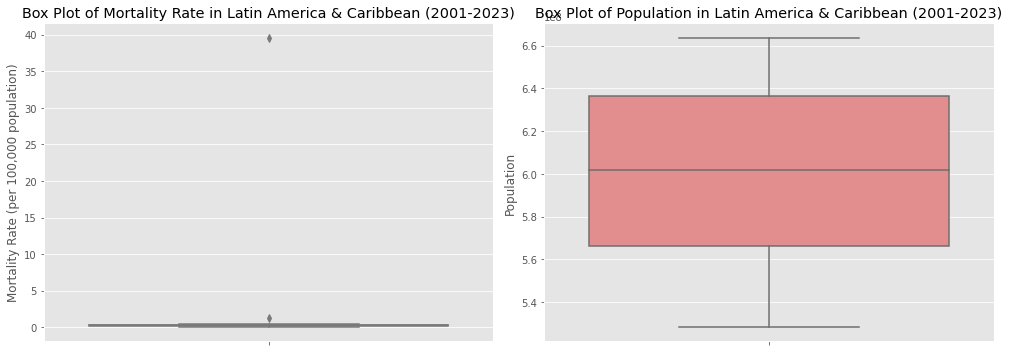

In [85]:
# Setting up the figure and axes
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))

# 1. Box plot for mortality rate
sns.boxplot(y=group['mortality_rate'], ax=ax[0], color='lightblue')
ax[0].set_title(f'Box Plot of Mortality Rate in {selected_group} (2001-2023)')
ax[0].set_ylabel('Mortality Rate (per 100,000 population)')

# 3. Box plot for population
sns.boxplot(y=group['total_population'], ax=ax[1], color='lightcoral')
ax[1].set_title(f'Box Plot of Population in {selected_group} (2001-2023)')
ax[1].set_ylabel('Population')

plt.tight_layout()
plt.show()

In [86]:
# Data preparation for Prophet
#pip install prophet-1.1.5-py3-none-win_amd64.whl
from prophet import Prophet
prophet_data = group[['year', 'mortality_rate']]
prophet_data.columns = ['ds', 'y']

# Convert year into proper datetime format
prophet_data['ds'] = pd.to_datetime(prophet_data['ds'].astype(str) + '-12-31')
prophet_data['y'] = prophet_data['y']

# # Calculate the median for the entire dataset

#overall_median = prophet_data['y'].median()

# Replace values in 'y' with this median
#prophet_data.loc[prophet_data['ds'].dt.year == 2022, 'y'] = overall_median
#prophet_data.loc[prophet_data['ds'].dt.year == 2023, 'y'] = overall_median
prophet_data

,ds,y
46,2001-12-31,0.355061
47,2002-12-31,0.162806
48,2003-12-31,0.272002
49,2004-12-31,1.204779
50,2005-12-31,0.438894
51,2006-12-31,0.060205
52,2007-12-31,0.309503
53,2008-12-31,0.284185
54,2009-12-31,0.226311
55,2010-12-31,39.549616


For Prophet:
The data is structured in a DataFrame with two columns:

ds: Represents the date (timestamp) set to the end of each year.

y: The mortality rate to be forecasted.

Now, let's move on to the Prophet forecasting:

In [87]:
# Assume `df` is your original full dataset, and 'ds' is your datetime column
split_date = '2018-12-31'  # This is an example split date
train_df = prophet_data[prophet_data['ds'] <= split_date]
test_df = prophet_data[prophet_data['ds'] > split_date]

# Define disasters as holidays
disasters = pd.DataFrame({
    'holiday': 'disaster',
    'ds': pd.to_datetime(['2010-12-31']),
    'lower_window': 0,
    'upper_window': 0,
})

# Initialize the Prophet model with additional parameters
model = Prophet(
    interval_width=0.95,
    growth='linear',
    yearly_seasonality=True,
    weekly_seasonality=False,
    daily_seasonality=False,
    holidays=disasters,
    seasonality_mode='multiplicative',
    #seasonality_mode='additive',
    changepoint_prior_scale=0.1,
    seasonality_prior_scale=200,
    #holidays_prior_scale=100,
    mcmc_samples=0
)

# Add a custom yearly seasonality
#model.add_seasonality(name='yearly', period=365.25, fourier_order=20)
# Now, you can fit your model on the training dataset
model.fit(train_df)

# And use the model to make predictions, then compare with the test dataset
future_dates = model.make_future_dataframe(periods=len(test_df), freq='Y')
forecast = model.predict(future_dates)

13:46:51 - cmdstanpy - INFO - Chain [1] start processing
13:46:51 - cmdstanpy - INFO - Chain [1] done processing


In [88]:
from sklearn.metrics import mean_absolute_error,mean_squared_error, mean_absolute_percentage_error

# Ensure that the 'ds' column in forecast and test_df are aligned and that both have the same length
forecasted_values = forecast.set_index('ds').loc[test_df['ds']]['yhat']
actual_values = test_df.set_index('ds')['y']

# Calculate MAE
mae = mean_absolute_error(actual_values, forecasted_values)
print(f"The MAE of the forecast is: {mae}")

# Calculate RMSE
# rmse = np.sqrt(mean_squared_error(actual_values, forecasted_values))
# print(f"The RMSE of the forecast is: {rmse}")

# # Calculate MAPE
# mape = mean_absolute_percentage_error(actual_values, forecasted_values)
# print(f"The MAPE of the forecast is: {mape}")
print(forecasted_values)
print(actual_values)

The MAE of the forecast is: 0.16231238639053558
ds
2019-12-31    0.119981
2020-12-31    0.359605
2021-12-31    0.126911
2022-12-31    0.047280
2023-12-31    0.129884
Name: yhat, dtype: float64
ds
2019-12-31    0.176920
2020-12-31    0.145655
2021-12-31    0.446216
2022-12-31    0.254344
2023-12-31    0.115580
Name: y, dtype: float64


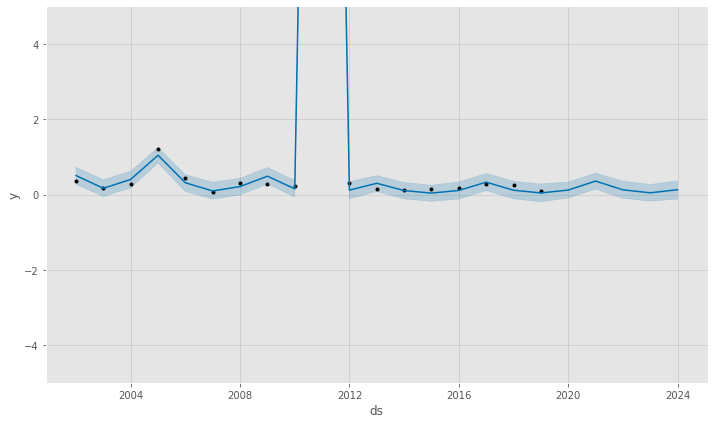

In [89]:
# changepoint_prior_scale=2
# Forecasting for 2023 to 2025
future_dates = model.make_future_dataframe(periods=5, freq='Y')
forecast = model.predict(future_dates)

# Plot the forecast
fig = model.plot(forecast)
ax = fig.gca()
ax.set_ylim(-5, 5)
#from prophet.plot import add_changepoints_to_plot
#a = add_changepoints_to_plot(fig.gca(), model, forecast)

plt.show()

In [90]:
# Print the forecast
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(6))

           ds      yhat  yhat_lower  yhat_upper
17 2018-12-31  0.043605   -0.191462    0.282242
18 2019-12-31  0.119981   -0.092086    0.334224
19 2020-12-31  0.359605    0.143135    0.572931
20 2021-12-31  0.126911   -0.096997    0.360582
21 2022-12-31  0.047280   -0.174572    0.268701
22 2023-12-31  0.129884   -0.119490    0.364085


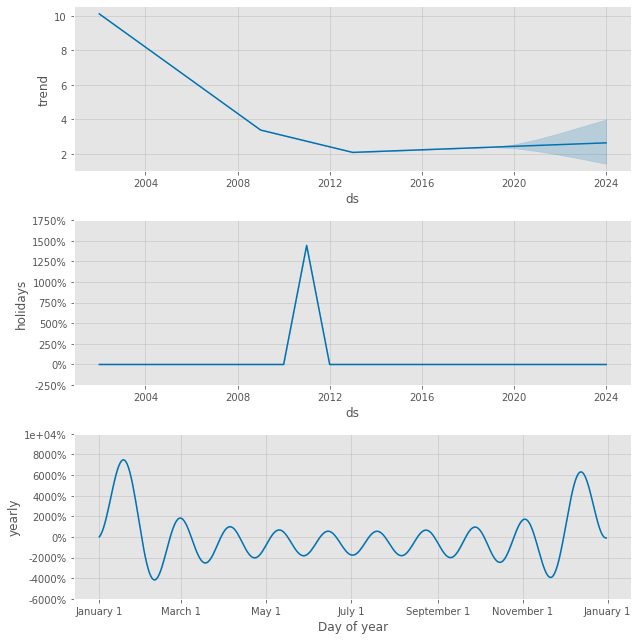

In [91]:
# Displaying components of the forecast
fig2 = model.plot_components(forecast)

In [92]:
# Assume `df` is your original full dataset, and 'ds' is your datetime column
split_date = '2018-12-31'  # This is an example split date
train_df = prophet_data[prophet_data['ds'] <= split_date]
test_df = prophet_data[prophet_data['ds'] > split_date]

# Define the carrying capacity. This is just an example value.
# You need to set this to a reasonable value based on your knowledge of the domain.
train_df['cap'] = 60
test_df['cap'] = 60

# Define disasters as holidays
disasters = pd.DataFrame({
    'holiday': 'disaster',
    'ds': pd.to_datetime(['2003-12-31', '2011-12-31']),
    'lower_window': 0,
    'upper_window': 0,
})

# Initialize the Prophet model with additional parameters
model = Prophet(
    interval_width=0.95,
    growth='linear',
    yearly_seasonality=True,
    weekly_seasonality=False,
    daily_seasonality=False,
    holidays=disasters,
    seasonality_mode='multiplicative',
    #seasonality_mode='additive',
    changepoint_prior_scale=0.15,
    #seasonality_prior_scale=20,
    holidays_prior_scale=160,
    mcmc_samples=0
)
# Fit your model on the training dataset
model.fit(train_df)

# Use the model to make predictions on the future dataframe
# Make sure to include the carrying capacity in the future dataframe
future_dates = model.make_future_dataframe(periods=len(test_df), freq='Y')
#future_dates['cap'] = 200  # This should be the same value as in the training data
forecast = model.predict(future_dates)


13:46:52 - cmdstanpy - INFO - Chain [1] start processing
13:46:52 - cmdstanpy - INFO - Chain [1] done processing


In [93]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

# Ensure that the 'ds' column in forecast and test_df are aligned and that both have the same length
forecasted_values = forecast.set_index('ds').loc[test_df['ds']]['yhat']
actual_values = test_df.set_index('ds')['y']

# Calculate MAE
mae = mean_absolute_error(actual_values, forecasted_values)
print(f"The MAE of the forecast is: {mae}")

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(actual_values, forecasted_values))
print(f"The RMSE of the forecast is: {rmse}")

# Calculate MAPE
mape = mean_absolute_percentage_error(actual_values, forecasted_values)
print(f"The MAPE of the forecast is: {mape}")

The MAE of the forecast is: 2.881979973861791
The RMSE of the forecast is: 3.3427226861309194
The MAPE of the forecast is: 17.032306455513798


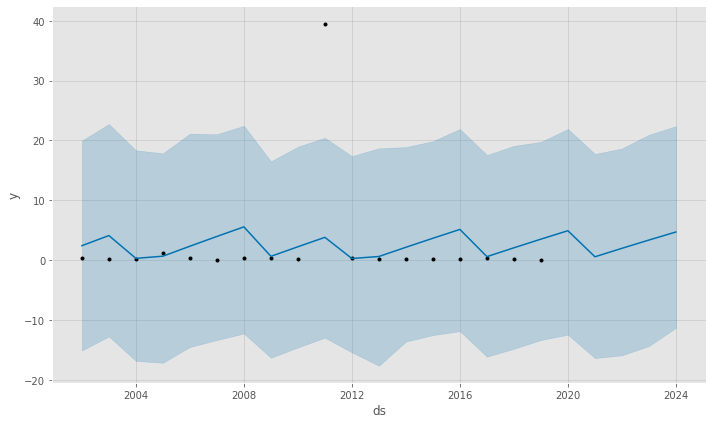

In [94]:
# Plot the forecast
fig = model.plot(forecast)


#from prophet.plot import add_changepoints_to_plot
#a = add_changepoints_to_plot(fig.gca(), model, forecast)
# Customize the plot
ax = fig.gca()
#ax.set_ylim(-5, 20)
plt.show()

In [95]:
# Print the forecast
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(5))

           ds      yhat  yhat_lower  yhat_upper
18 2019-12-31  4.925056  -12.458086   21.922129
19 2020-12-31  0.567237  -16.366736   17.747376
20 2021-12-31  1.981306  -15.897719   18.671290
21 2022-12-31  3.363342  -14.351185   20.954385
22 2023-12-31  4.711673  -11.308194   22.388545
